In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

## SrO Calculations

mpirun -np 6 ~/Software/qe-6.4.1/bin/pp.x <SrO.pp.in> SrO.pp.out


#### 1) Relax. Equilirbium bond length 
Vary the bond distance between Sr and O atoms by displacing the O atom along x-axis for various positions, and scan for total energy. 


In [29]:
bondlen_list = [1, 1.3, 1.4, 1.5, 1.6, 1.8, 2.1, 2.3, 2.5,3 ]
sro_bondlen_energy = [-108.25435151,-110.89789779,-111.21830222,-111.42775891, -111.56129192,-111.68196506 ,-111.67895925,-111.63176576, -111.57642479, -111.22997402]

-111.68196506
1.8


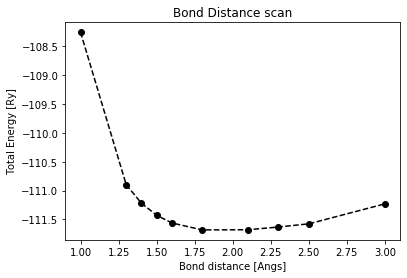

In [34]:

plt.plot(bondlen_list, sro_bondlen_energy,'k--',marker='o') 
plt.title('Bond Distance scan')

plt.xlabel('Bond distance [Angs]')
plt.ylabel('Total Energy [Ry]')

print(min(sro_bondlen_energy))
minpos = np.argmin(sro_bondlen_energy)
print(bondlen_list[minpos])

In [43]:
# scf calculation reults (ecut = 70)
bondlength = ( 2.053818087)- 0.126181913
bondlength

1.9276361739999999

In [44]:
# relax calculation reults (ecut = 70)
bondlength = ( 2.013854335)- 0.086145665
bondlength

1.92770867

LITERATURE VALUES: ???

https://books.google.com/books?id=X6fBBAAAQBAJ&pg=PA144&lpg=PA144&dq=sro+bond+length&source=bl&ots=nMb-G4Vznd&sig=ACfU3U17AZJdoV0SbRf2PaY59XsxjBxbzQ&hl=en&sa=X&ved=2ahUKEwiMndjGmvToAhWFpp4KHQmSBKQ4ChDoATABegQIDBAo#v=onepage&q=sro%20bond%20length&f=false

https://www.hindawi.com/journals/jtc/2013/720794/


http://downloads.hindawi.com/archive/2013/720794.pdf

#### 2) Convergence tests: ecut, cellsize.

In [35]:
ecut = [20, 30, 40, 50,60,70,100] 
sro_ecut_energy = [ -111.07312377, -111.6323355026, -111.6935776504,-111.6962057571,-111.6965825556,-111.6972436664, -111.6975811079 ]

Text(0, 0.5, 'Energy [Ry]')

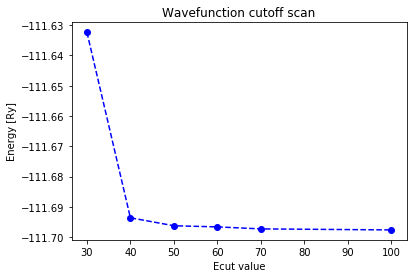

In [37]:
#energy_list_Ry = [energy*0.0734986176 for energy in energy_list]#converts unit to Ryd

fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
plt.plot(ecut[1:], sro_ecut_energy[1:],'b--',marker='o') 
plt.title('Wavefunction cutoff scan')

plt.xlabel('Ecut value')
plt.ylabel('Energy [Ry]')

# print(min(energy_list_Ry))
# minpos = np.argmin(energy_list_Ry)
# print(alat_list[minpos])

In [55]:
# unit cell vaccum padding scan (ecut = 70, at relaxed bond positions, gamma point)
cellsize = [5,10, 15,20,25, 30,35, 40]
sro_cellsize_energy =[-96.48447016,-111.68145259,-111.69734008,-111.69722216,-111.69530528,-111.69430081,-111.69377313,-111.69347446]


Text(0, 0.5, 'Energy [Ry]')

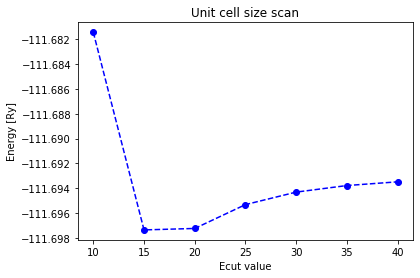

In [60]:
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
plt.plot(cellsize[1:], sro_cellsize_energy[1:],'b--',marker='o') 
plt.title('Unit cell size scan')

plt.xlabel('Ecut value')
plt.ylabel('Energy [Ry]')

# print(min(energy_list_Ry))
# minpos = np.argmin(energy_list_Ry)
# print(alat_list[minpos])

#### 3. Vibrations

Stretching frequency of isolated diatomic SrO molecule

https://aip.scitation.org/doi/pdf/10.1063/1.4943703

Tutorial:
https://www.quantum-espresso.org/resources/tutorials/shanghai-2013/hands-on-phonons/phonons_tutorial_shanghai1.pdf

https://www.paradim.org/sites/default/files/2019-05/FelicianosTutorialswatermarked.pdf

###  bader charge

In [144]:
9.319369-8.755189

0.5641800000000003

In [61]:
# Creates: h2o-bader.png
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from ase.io.cube import read_cube_data


In [148]:
if os.path.isfile('sro2.pckl'):
    with open('sro2.pckl', 'rb') as fd:
        dens, bader, atoms = pickle.load(fd)
else:
    dens, atoms = read_cube_data('SrO.cube')
    bader, atoms = read_cube_data('AtIndex.cube')
    x = len(dens) // 2
    dens = dens[x]
    bader = bader[x]
    with open('SrO.pckl', 'wb') as fd:
        pickle.dump((dens, bader, atoms), fd)

x0, y0, z0 = atoms.positions[0]
y = np.linspace(0, atoms.cell[1, 1], len(dens), endpoint=False) - y0
z = np.linspace(0, atoms.cell[2, 2], len(dens[0]), endpoint=False) - z0



In [149]:
x = np.linspace(0, atoms.cell[0, 0], len(dens[2]), endpoint=False) - x0

(180,) (180,) (180, 180) (180, 180)
[[5.12618197 5.0000002  5.0000002 ]
 [7.05381791 5.0000002  5.0000002 ]]
-8.7575e-07 0.009527853135646082 3.2615


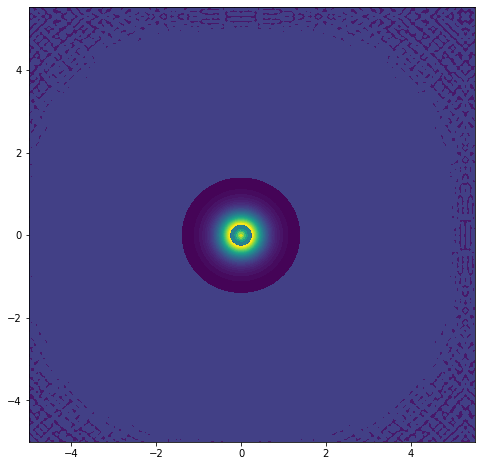

In [150]:
print(y.shape, z.shape, dens.shape, bader.shape)
print(atoms.positions)
print(dens.min(), dens.mean(), dens.max())
plt.figure(figsize=(8, 8))
plt.contourf(z, y, dens)
plt.contourf(z, y, dens, np.linspace(0.01, 0.9, 50))
#plt.contour(z, y, bader, [0.5],colors='k')

plt.savefig('SrO-bader.png')


### Diamond Surface Slab

#### 1 unit cell relax, then make supercell. then vc relax and relax


In [ ]:
import os
from labutil.plugins.pwscf import run_qe_pwscf, PWscf_inparam, parse_qe_pwscf_output
from labutil.objects import Struc, Dir, ase2struc, Kpoints, PseudoPotential
from ase.spacegroup import crystal
from ase.io import write
import matplotlib.pyplot as plt


def make_struc(alat):
    """
    Creates the crystal structure using ASE.
    :param alat: Lattice parameter in angstrom
    :return: structure object converted from ase
    """
    # set primitive_cell=False if you want to create a simple cubic unit cell with 8 atoms
    gecell = crystal('Ge', [(0, 0, 0)], spacegroup=227, cellpar=[alat, alat, alat, 90, 90, 90], primitive_cell=True)
    # check how your cell looks like
    write('s.cif', gecell)
    structure = Struc(ase2struc(gecell))
    return structure

In [170]:
from ase.build import diamond100

diamond = ase.build.diamond100('C',size=(10, 10, 5), a=3.567, vacuum = 10, orthogonal=True,periodic=True)
from ase.visualize import view
view(diamond)

write('diamond.cif', diamond)

#### 2. converence with cellsize-- vaccum padding??

#### bader/ charge distribution

### Molecule on Surface

#### 1. relax (check animation), formation energy, 

#### bader charger

#### sro bond length, bond energy on slab

#### vibration modes

#### DOS spectrum homo lumo

#### Others: two SrO (interactions energy, two on surface formation energy?, bond strenghts?, bader chaege, dos spectrum, modes). repeat for SrOH on surface. Sr on sapphire surface? 